In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [7]:
data['Embarked'] = data['Embarked'].fillna('S')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data = data[['Survived', 'Pclass','Sex','Age','SibSp','Parch','Embarked']]

In [11]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [13]:
data['family'] = data['SibSp'] + data['Parch'] + 1

In [14]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2


In [15]:
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [16]:
def age_dist(age):
        if 0 <= age < 10:
            return 'under 10s'
        elif 10 <= age < 20:
            return '10s'
        elif 20 <= age < 30:
            return '20s'
        elif 30 <= age < 40:
            return '30s'
        elif 40 <= age < 50:
            return '40s'
        elif 50 <= age < 60:
            return '50s'
        elif 60 <= age < 70:
            return '60s'
        elif 70 <= age < 80:
            return '70s'
        elif 80 <= age < 90:
            return '80s'

In [17]:
data['Age'] = data['Age'].apply(age_dist)

In [18]:
data.head(2)

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,20s,S,2
1,1,1,female,30s,C,2


In [19]:
data = pd.get_dummies(data, drop_first=True)
data.head(2)

,Survived,Pclass,family,Sex_male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under 10s,Embarked_Q,Embarked_S
0,0,3,2,1,1,0,0,0,0,0,0,0,0,1
1,1,1,2,0,0,1,0,0,0,0,0,0,0,0


In [20]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [22]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=7)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 6, n_estimators=1000, criterion='entropy', 
                             n_jobs=-1, random_state=10)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



# tensorflow Sequential API를 사용한 순차적 모델

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
X_train.shape

(712, 13)

In [80]:
# 딥러닝 신경망 모델 정의
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))  # input_dim: 독립변수의 컬럼 수 X: 입력층
model.add(Dense(60, activation='relu'))  # 은닉층 1
model.add(Dense(15, activation='relu'))  # 은닉층 2
model.add(Dense(1, activation='sigmoid'))  # 출력층 sigmoid: 이진분류

In [81]:
# 신경망 훈련시 사용할 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 30)                420       
                                                                 
 dense_23 (Dense)            (None, 60)                1860      
                                                                 
 dense_24 (Dense)            (None, 15)                915       
                                                                 
 dense_25 (Dense)            (None, 1)                 16        
                                                                 
Total params: 3,211
Trainable params: 3,211
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test,y_test))

Epoch 1/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8708 - val_loss: 0.7249 - val_accuracy: 0.7654
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8778 - val_loss: 0.7367 - val_accuracy: 0.7933
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8680 - val_loss: 0.7520 - val_accuracy: 0.7598
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8722 - val_loss: 0.7227 - val_accuracy: 0.7598
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8722 - val_loss: 0.7356 - val_accuracy: 0.7598
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8638 - val_loss: 0.7238 - val_accuracy: 0.7821
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8624 - val_loss: 0.7361 - val_accuracy: 0.7821
Epoch 8/200
3

Epoch 59/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8567 - val_loss: 0.7640 - val_accuracy: 0.7709
Epoch 60/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8708 - val_loss: 0.7575 - val_accuracy: 0.7765
Epoch 61/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8694 - val_loss: 0.7655 - val_accuracy: 0.7709
Epoch 62/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8750 - val_loss: 0.7647 - val_accuracy: 0.7765
Epoch 63/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8694 - val_loss: 0.7685 - val_accuracy: 0.7765
Epoch 64/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8722 - val_loss: 0.7716 - val_accuracy: 0.7765
Epoch 65/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8722 - val_loss: 0.7710 - val_accuracy: 0.7654
Epoch 

36/36 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8792 - val_loss: 0.8530 - val_accuracy: 0.7654
Epoch 117/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8722 - val_loss: 0.8117 - val_accuracy: 0.7598
Epoch 118/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8680 - val_loss: 0.8030 - val_accuracy: 0.7821
Epoch 119/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8764 - val_loss: 0.8188 - val_accuracy: 0.7765
Epoch 120/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8694 - val_loss: 0.8090 - val_accuracy: 0.7933
Epoch 121/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8680 - val_loss: 0.7952 - val_accuracy: 0.7821
Epoch 122/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8750 - val_loss: 0.8170 - val_accuracy: 0.7709
Epoch 123/200

36/36 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8792 - val_loss: 0.8294 - val_accuracy: 0.7765
Epoch 174/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8736 - val_loss: 0.8266 - val_accuracy: 0.7765
Epoch 175/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8736 - val_loss: 0.8089 - val_accuracy: 0.7821
Epoch 176/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.8666 - val_loss: 0.8275 - val_accuracy: 0.7765
Epoch 177/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8736 - val_loss: 0.8409 - val_accuracy: 0.7765
Epoch 178/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8750 - val_loss: 0.8131 - val_accuracy: 0.7877
Epoch 179/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8750 - val_loss: 0.8196 - val_accuracy: 0.7765
Epoch 180/200

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 정확성을 보는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* 두 지표간 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [84]:
score = model.evaluate(X_test,y_test)
print('test loss', score[0])
print('test accuracy', score[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.8257 - accuracy: 0.7821
test loss 0.8256635665893555
test accuracy 0.7821229100227356


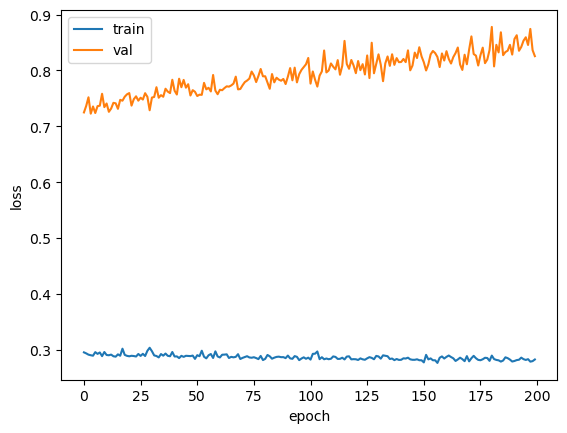

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [86]:
pred = model.predict(X_test)
print(pred.shape)

6/6 [==============================] - 0s 1ms/step
(179, 1)


In [87]:
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
pred

0      0
1      0
2      0
3      0
4      1
      ..
174    1
175    1
176    0
177    0
178    1
Name: 0, Length: 179, dtype: int64

In [88]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.7821229050279329
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       110
           1       0.79      0.59      0.68        69

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



# Tensorflow Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 형태의 모델 생성에 한계가 있음.
* Functional API는 입력층과 출력층을 사용자가 직접 정의가능
* 다중입력(multi-input), 다중출력(multi-output)등 복작한 모델을 정의 할 수 있음.
* input(shape=(독립변수 수,)) 로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의

In [89]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [90]:
inputs = Input(shape=(X_train.shape[1], )) # 입력층 정의 (컬럼(특성,Feature) 14개를 입력으로 받음)
x = Dense(30, activation='relu')(inputs) # 은닉층 1번
x = Dense(60, activation='relu')(x) # 은닉층 2번
x = Dense(15, activation='relu')(x) # 은닉층 2번
x = Dense(1, activation='sigmoid')(x) # 출력층
model = Model(inputs, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_26 (Dense)            (None, 30)                420       
                                                                 
 dense_27 (Dense)            (None, 60)                1860      
                                                                 
 dense_28 (Dense)            (None, 15)                915       
                                                                 
 dense_29 (Dense)            (None, 1)                 16        
                                                                 
Total params: 3,211
Trainable params: 3,211
Non-trainable params: 0
_________________________________________________________________


Epoch 1/400
8/8 [==============================] - 1s 23ms/step - loss: 0.6634 - accuracy: 0.5716 - val_loss: 0.6254 - val_accuracy: 0.6145
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6153 - accuracy: 0.6166 - val_loss: 0.6180 - val_accuracy: 0.6145
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6007 - accuracy: 0.6166 - val_loss: 0.6115 - val_accuracy: 0.6089
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 0.5895 - accuracy: 0.6390 - val_loss: 0.6072 - val_accuracy: 0.6201
Epoch 5/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5748 - accuracy: 0.6657 - val_loss: 0.6007 - val_accuracy: 0.6201
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.6784 - val_loss: 0.5950 - val_accuracy: 0.6536
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5478 - accuracy: 0.7135 - val_loss: 0.5894 - val_accuracy: 0.6648
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.8441 - val_loss: 0.5096 - val_accuracy: 0.7989
Epoch 60/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3701 - accuracy: 0.8455 - val_loss: 0.5096 - val_accuracy: 0.7989
Epoch 61/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.8441 - val_loss: 0.4978 - val_accuracy: 0.7877
Epoch 62/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3688 - accuracy: 0.8497 - val_loss: 0.4977 - val_accuracy: 0.7877
Epoch 63/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.8441 - val_loss: 0.5024 - val_accuracy: 0.7989
Epoch 64/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.8455 - val_loss: 0.5061 - val_accuracy: 0.7877
Epoch 65/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3633 - accuracy: 0.8483 - val_loss: 0.5035 - val_accuracy: 0.7877
Epoch 66/400
8/8 [===============

8/8 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.8469 - val_loss: 0.5208 - val_accuracy: 0.7989
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8413 - val_loss: 0.5176 - val_accuracy: 0.7989
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3457 - accuracy: 0.8511 - val_loss: 0.5099 - val_accuracy: 0.7933
Epoch 120/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3378 - accuracy: 0.8567 - val_loss: 0.5234 - val_accuracy: 0.7989
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3402 - accuracy: 0.8596 - val_loss: 0.5209 - val_accuracy: 0.7821
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3411 - accuracy: 0.8610 - val_loss: 0.5152 - val_accuracy: 0.8045
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3433 - accuracy: 0.8511 - val_loss: 0.5151 - val_accuracy: 0.8212
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3243 - accuracy: 0.8624 - val_loss: 0.5387 - val_accuracy: 0.7877
Epoch 176/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3232 - accuracy: 0.8666 - val_loss: 0.5543 - val_accuracy: 0.7933
Epoch 177/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3217 - accuracy: 0.8666 - val_loss: 0.5488 - val_accuracy: 0.7821
Epoch 178/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3194 - accuracy: 0.8680 - val_loss: 0.5383 - val_accuracy: 0.7821
Epoch 179/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3221 - accuracy: 0.8666 - val_loss: 0.5453 - val_accuracy: 0.7989
Epoch 180/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.8581 - val_loss: 0.5507 - val_accuracy: 0.7933
Epoch 181/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3198 - accuracy: 0.8652 - val_loss: 0.5513 - val_accuracy: 0.7933
Epoch 182/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.8638 - val_loss: 0.5896 - val_accuracy: 0.7821
Epoch 234/400
8/8 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.8652 - val_loss: 0.5734 - val_accuracy: 0.7765
Epoch 235/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3117 - accuracy: 0.8581 - val_loss: 0.5897 - val_accuracy: 0.7989
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3208 - accuracy: 0.8553 - val_loss: 0.5777 - val_accuracy: 0.7765
Epoch 237/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3174 - accuracy: 0.8680 - val_loss: 0.5815 - val_accuracy: 0.7765
Epoch 238/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3133 - accuracy: 0.8694 - val_loss: 0.5868 - val_accuracy: 0.7877
Epoch 239/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8610 - val_loss: 0.5668 - val_accuracy: 0.7877
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8610 - val_loss: 0.5975 - val_accuracy: 0.7821
Epoch 292/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3030 - accuracy: 0.8694 - val_loss: 0.5915 - val_accuracy: 0.7821
Epoch 293/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.8722 - val_loss: 0.5935 - val_accuracy: 0.7821
Epoch 294/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3016 - accuracy: 0.8722 - val_loss: 0.6072 - val_accuracy: 0.7765
Epoch 295/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.8708 - val_loss: 0.5988 - val_accuracy: 0.7821
Epoch 296/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3023 - accuracy: 0.8764 - val_loss: 0.5980 - val_accuracy: 0.7765
Epoch 297/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.8680 - val_loss: 0.6103 - val_accuracy: 0.7877
Epoch 298/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3036 - accuracy: 0.8652 - val_loss: 0.6158 - val_accuracy: 0.7709
Epoch 350/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2960 - accuracy: 0.8708 - val_loss: 0.6234 - val_accuracy: 0.7765
Epoch 351/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.8666 - val_loss: 0.6208 - val_accuracy: 0.7765
Epoch 352/400
8/8 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.8722 - val_loss: 0.6160 - val_accuracy: 0.7821
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.8680 - val_loss: 0.6176 - val_accuracy: 0.7821
Epoch 354/400
8/8 [==============================] - 0s 6ms/step - loss: 0.2931 - accuracy: 0.8722 - val_loss: 0.6199 - val_accuracy: 0.7821
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.8694 - val_loss: 0.6280 - val_accuracy: 0.7765
Epoch 356/400
8/8 [========

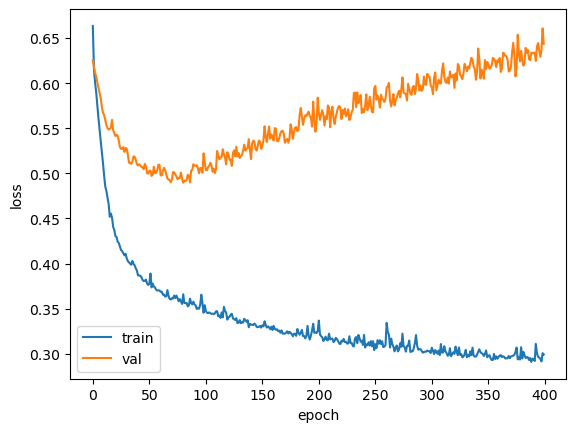

In [91]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs= 400, batch_size= 100, validation_data=(X_test,y_test))
score = model.evaluate(X_test, y_test)
print('test_loss:', score[0])
print('test_accuracy:', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의방법
* tf.keras.Model을 상속받아 작성한다.

In [92]:
class Titanic(tf.keras.Model):
    
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation='relu')
        self.dense2 = tf.keras.layers.Dense(60, activation='relu')
        self.dense3 = tf.keras.layers.Dense(15, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [93]:
model = Titanic() # Titanic 클래스

Epoch 1/400
8/8 [==============================] - 1s 21ms/step - loss: 0.7075 - accuracy: 0.3989 - val_loss: 0.6787 - val_accuracy: 0.6034
Epoch 2/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.6306 - val_loss: 0.6447 - val_accuracy: 0.6369
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6312 - accuracy: 0.6390 - val_loss: 0.6217 - val_accuracy: 0.6369
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6048 - accuracy: 0.6433 - val_loss: 0.6072 - val_accuracy: 0.6536
Epoch 5/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5822 - accuracy: 0.6643 - val_loss: 0.5964 - val_accuracy: 0.6704
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5634 - accuracy: 0.6882 - val_loss: 0.5896 - val_accuracy: 0.6704
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5475 - accuracy: 0.6980 - val_loss: 0.5840 - val_accuracy: 0.7095
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8553 - val_loss: 0.5264 - val_accuracy: 0.7933
Epoch 60/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3541 - accuracy: 0.8511 - val_loss: 0.5229 - val_accuracy: 0.7821
Epoch 61/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3545 - accuracy: 0.8581 - val_loss: 0.5226 - val_accuracy: 0.7821
Epoch 62/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3473 - accuracy: 0.8581 - val_loss: 0.5320 - val_accuracy: 0.7765
Epoch 63/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3485 - accuracy: 0.8581 - val_loss: 0.5348 - val_accuracy: 0.7821
Epoch 64/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3508 - accuracy: 0.8567 - val_loss: 0.5312 - val_accuracy: 0.7765
Epoch 65/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3473 - accuracy: 0.8610 - val_loss: 0.5370 - val_accuracy: 0.7709
Epoch 66/400
8/8 [===============

8/8 [==============================] - 0s 6ms/step - loss: 0.3239 - accuracy: 0.8652 - val_loss: 0.5609 - val_accuracy: 0.7654
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8652 - val_loss: 0.5576 - val_accuracy: 0.7765
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3217 - accuracy: 0.8638 - val_loss: 0.5630 - val_accuracy: 0.7654
Epoch 120/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3275 - accuracy: 0.8610 - val_loss: 0.5751 - val_accuracy: 0.7821
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3233 - accuracy: 0.8666 - val_loss: 0.5786 - val_accuracy: 0.7765
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.8567 - val_loss: 0.5751 - val_accuracy: 0.7765
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.8610 - val_loss: 0.5860 - val_accuracy: 0.7654
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.3085 - accuracy: 0.8638 - val_loss: 0.5965 - val_accuracy: 0.7765
Epoch 176/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3091 - accuracy: 0.8666 - val_loss: 0.5947 - val_accuracy: 0.7765
Epoch 177/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.8680 - val_loss: 0.6040 - val_accuracy: 0.7765
Epoch 178/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.8722 - val_loss: 0.6033 - val_accuracy: 0.7765
Epoch 179/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3102 - accuracy: 0.8666 - val_loss: 0.6013 - val_accuracy: 0.7765
Epoch 180/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8666 - val_loss: 0.6056 - val_accuracy: 0.7654
Epoch 181/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.8680 - val_loss: 0.6153 - val_accuracy: 0.7765
Epoch 182/400
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.3038 - accuracy: 0.8680 - val_loss: 0.6185 - val_accuracy: 0.7654
Epoch 234/400
8/8 [==============================] - 0s 10ms/step - loss: 0.3086 - accuracy: 0.8694 - val_loss: 0.6305 - val_accuracy: 0.7654
Epoch 235/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3030 - accuracy: 0.8722 - val_loss: 0.6296 - val_accuracy: 0.7765
Epoch 236/400
8/8 [==============================] - 0s 7ms/step - loss: 0.3150 - accuracy: 0.8680 - val_loss: 0.6400 - val_accuracy: 0.7765
Epoch 237/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3080 - accuracy: 0.8638 - val_loss: 0.6273 - val_accuracy: 0.7765
Epoch 238/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.8680 - val_loss: 0.6352 - val_accuracy: 0.7765
Epoch 239/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3017 - accuracy: 0.8736 - val_loss: 0.6412 - val_accuracy: 0.7821
Epoch 240/400
8/8 [=======

8/8 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.8736 - val_loss: 0.6858 - val_accuracy: 0.7765
Epoch 292/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2954 - accuracy: 0.8792 - val_loss: 0.6782 - val_accuracy: 0.7765
Epoch 293/400
8/8 [==============================] - 0s 6ms/step - loss: 0.2983 - accuracy: 0.8694 - val_loss: 0.6739 - val_accuracy: 0.7765
Epoch 294/400
8/8 [==============================] - 0s 6ms/step - loss: 0.2928 - accuracy: 0.8764 - val_loss: 0.6682 - val_accuracy: 0.7765
Epoch 295/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.8736 - val_loss: 0.6746 - val_accuracy: 0.7654
Epoch 296/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.8624 - val_loss: 0.6802 - val_accuracy: 0.7765
Epoch 297/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.8722 - val_loss: 0.6814 - val_accuracy: 0.7765
Epoch 298/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.8764 - val_loss: 0.7023 - val_accuracy: 0.7765
Epoch 350/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2946 - accuracy: 0.8708 - val_loss: 0.7032 - val_accuracy: 0.7877
Epoch 351/400
8/8 [==============================] - 0s 4ms/step - loss: 0.2913 - accuracy: 0.8694 - val_loss: 0.7126 - val_accuracy: 0.7765
Epoch 352/400
8/8 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8708 - val_loss: 0.7016 - val_accuracy: 0.7765
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2911 - accuracy: 0.8680 - val_loss: 0.6958 - val_accuracy: 0.7765
Epoch 354/400
8/8 [==============================] - 0s 4ms/step - loss: 0.2909 - accuracy: 0.8722 - val_loss: 0.6974 - val_accuracy: 0.7765
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2957 - accuracy: 0.8652 - val_loss: 0.7027 - val_accuracy: 0.7765
Epoch 356/400
8/8 [========

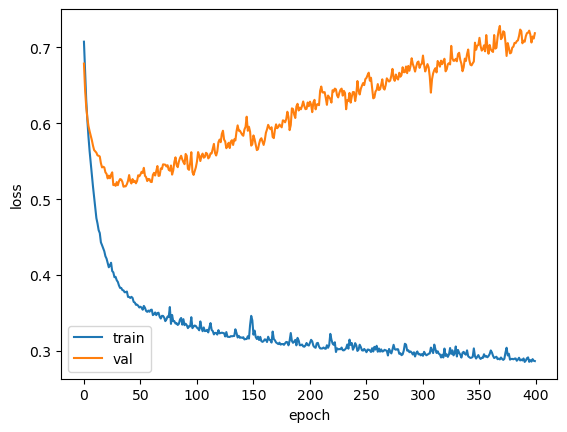

In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs= 400, batch_size= 100, validation_data=(X_test,y_test))
score = model.evaluate(X_test, y_test)
print('test_loss:', score[0])
print('test_accuracy:', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()